<a href="https://colab.research.google.com/github/jaeriver/2022_AI_Security_Project/blob/main/Friday_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
from keras.utils.np_utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Processing**

---



In [3]:
train_dataset=pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Monday_Standard_Normal.csv')
train_dataset[train_dataset['Label'] == 'Anormal']

,Unnamed: 0,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Label
0,0,-1.596917,-1.597767,-0.358426,0.393771,-2.368164,0.781272,-0.476918,-0.854834,-0.005554,-0.006511,-0.000437,0.028992,Anormal
2,2,-1.596917,-1.593840,3.767072,-3.587419,-2.642139,-1.653387,-0.497628,-1.957874,-0.009816,-0.006690,0.073520,-0.085479,Anormal
4,4,-1.596917,-1.594288,3.149198,0.393771,0.567861,0.443532,-0.495151,1.167405,-0.006407,-0.006434,-0.007161,-0.062681,Anormal
5,5,-1.596917,-1.597767,-0.361342,0.393771,-2.368164,0.781272,-0.476918,-0.854834,-0.009816,-0.006690,-0.009402,-0.083553,Anormal
7,7,-1.596892,-1.597742,-0.361342,0.393771,-1.831345,0.776312,-0.476918,-0.854834,-0.009816,-0.006690,-0.009402,-0.083553,Anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529908,529908,1.284562,1.385883,1.866879,0.393771,-2.639202,0.707681,-0.476918,-0.854834,-0.009816,-0.006690,-0.009402,-0.073599,Anormal
529910,529910,1.284587,1.283916,-0.358427,0.393771,-2.368164,0.781190,-0.476918,-0.854834,-0.005554,-0.006511,-0.000437,0.028992,Anormal
529912,529912,1.284587,1.385436,1.233594,0.393771,0.223515,0.781231,-0.476918,-0.854834,-0.002145,-0.006192,0.004045,0.435501,Anormal
529913,529913,1.284587,1.385908,1.866874,0.393771,-1.871518,0.714774,-0.476918,-0.854834,-0.009816,-0.006690,-0.009402,-0.073599,Anormal


In [4]:
train_dataset = train_dataset.drop(['Unnamed: 0'],axis=1)


In [5]:
test_dataset=pd.read_csv('/content/drive/MyDrive/인공지능보안프로젝트/datasets/Friday_preprocess.csv')
test_dataset

,Unnamed: 0,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt,Label
0,0,20170707010000,20170707010001,1266342,3232238092,3232238130,35396,22,6,44,6954.0,41,2664,Normal
1,1,20170707010000,20170707010001,1319353,3232238096,3232238130,60058,22,6,44,6954.0,41,2664,Normal
2,2,20170707010000,20170707010000,160,3232238092,3232238130,35396,22,6,1,0.0,1,0,Normal
3,3,20170707010000,20170707010001,1303488,3232238092,3232238130,35398,22,6,42,6634.0,41,2728,Normal
4,4,20170707010000,20170707010000,77,3232238130,3232238092,22,35396,6,2,0.0,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703240,703240,20170707125900,20170707125900,61452,3232238094,3232238083,51018,53,17,2,354.0,4,180,Normal
703241,703241,20170707125900,20170707125900,171,3232238094,3232238083,49984,53,17,2,272.0,2,80,Normal
703242,703242,20170707125900,20170707125900,222,3232238094,3232238083,64015,53,17,2,354.0,2,90,Normal
703243,703243,20170707125900,20170707125900,16842,3232238097,3328480178,123,123,17,1,48.0,1,48,Normal


In [6]:
test_dataset = test_dataset.drop(['Unnamed: 0'],axis=1)
test_dataset
df_col = test_dataset.columns

# **Model Training & Predict**

---



In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

In [8]:
def train_test_dataset_monday(df):
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    df = df.replace("Anormal", 1)
    df = df.replace("Normal", 0)
    X_train = df.drop(['Label'],axis=1)
    y_train = df.iloc[:, -1].values.reshape(-1,1)
    y_train = np.ravel(y_train)
    return X_train,y_train

In [9]:
m_train , y_train = train_test_dataset_monday(train_dataset)

In [10]:
y_train

array([0, 1, 0, ..., 1, 1, 1])

In [11]:
def train_test_dataset2(df):
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    df = df.replace("Anormal", 1)
    df = df.replace("Normal", 0)
    X_test = df.drop(['Label'],axis=1) 
    X_test = StandardScaler().fit_transform(X_test[0:])
    X_test = pd.DataFrame(X_test, columns = df_col[:-1])
    y_test = df.iloc[:, -1].values.reshape(-1,1)
    y_test=np.ravel(y_test)
    return X_test,y_test

In [12]:
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state = 0)
    imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
    rf_score=rf.score(X_test,y_test)
    y_predict=rf.predict(X_test)
    y_true=y_test
    print('Random Forest Accuracy:'+ str(rf_score))
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Random Forest precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return rf_score,precision,recall,fscore,none

In [13]:
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state = 0)
    imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    dt.fit(X_train, y_train)
    score=dt.score(X_test,y_test)
    print('Decision Tree Accuracy:'+ str(score))
   # print('Decision Tree Accuracy2:'+ str(accuracy_score(y_test, y_predict)))
    y_predict=dt.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Decision Tree precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none

In [14]:
def kNN(X_train, X_test, y_train, y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
    imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    knn.fit(X_train,y_train) 
    prediction=knn.predict(X_test)
    score=knn.score(X_test,y_test)
    print("5 nn score:"+ str(score))
    y_predict=knn.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('5nn precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none

In [15]:
NA_X_train, NA_y_train=train_test_dataset_monday(train_dataset)
NA_X_test, NA_y_test=train_test_dataset2(test_dataset)
NA_X_test

,ts,te,td,sa,da,sp,dp,pr,ipkt,ibyt,opkt,obyt
0,-1.213232,-1.214028,-0.330434,0.521596,0.378526,-0.242669,-0.459985,-0.604567,0.047486,-0.002183,0.059865,0.449120
1,-1.213232,-1.214028,-0.328551,0.521596,0.378526,0.900514,-0.459985,-0.604567,0.047486,-0.002183,0.059865,0.449120
2,-1.213232,-1.214058,-0.375413,0.521596,0.378526,-0.242669,-0.459985,-0.604567,-0.008244,-0.006208,-0.010021,-0.119436
3,-1.213232,-1.214028,-0.329114,0.521596,0.378526,-0.242576,-0.459985,-0.604567,0.044893,-0.002369,0.059865,0.462779
4,-1.213232,-1.214058,-0.375416,0.521596,0.378526,-1.882397,1.589134,-0.604567,-0.006948,-0.006208,-0.010021,-0.119436
...,...,...,...,...,...,...,...,...,...,...,...,...
703240,2.209892,2.209135,-0.373236,0.521596,0.378526,0.481474,-0.458189,1.650981,-0.006948,-0.006003,-0.004780,-0.081020
703241,2.209892,2.209135,-0.375413,0.521596,0.378526,0.433544,-0.458189,1.650981,-0.006948,-0.006050,-0.008274,-0.102362
703242,2.209892,2.209135,-0.375411,0.521596,0.378526,1.083937,-0.458189,1.650981,-0.006948,-0.006003,-0.008274,-0.100228
703243,2.209892,2.209135,-0.374820,0.521596,0.517677,-1.877715,-0.454134,1.650981,-0.008244,-0.006180,-0.010021,-0.109192


Random Forest Accuracy:0.43266429196083867
Random Forest precision_recall_fscore:0.361179198449202540.432664291960838670.38582299719991264


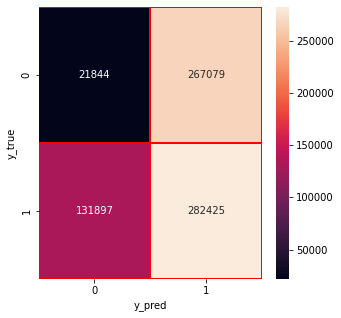

In [16]:
narf_score,narf_precision,narf_recall,narf_fscore,none=RandomForest(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [17]:
# nadt_score,nadt_precision,nadt_recall,nadt_fscore,none=DecisionTree(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [18]:
# naKnn_score,naKnn_precision,naKnn_recall,naKnn_fscore,none=kNN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [19]:
# d={'Algoritmalar': ["Random Forest", "Decision Tree", "KNN"], 
#    'Normal/Anormal accuracy':[narf_score, nadt_score, naKnn_score],
#   }
d={'Algoritmalar': ["Random Forest"], 
   'Normal/Anormal accuracy':[narf_score]}
dataframe= pd.DataFrame(data=d)
dataframe

,Algoritmalar,Normal/Anormal accuracy
0,Random Forest,0.432664
